[1]

(1, 1)
poly:
1


[  1  -1]
[-24   1]

(2, -23)
poly:
(-24) * (x - 25/24)


[  1  -1   0]
[-24   1  -2]
[-72 -24   1]

(3, -215)
poly:
(-84) * (x^2 - 19/7*x + 143/84)


[    1    -1     0     0]
[  -24     1    -2     0]
[  -72   -24     1    -3]
[18810   -72   -24     1]

(4, 113869)
poly:
(19074) * (x^3 - 19088/3179*x^2 + 35007/3179*x - 10417/1734)
(5, 13050493)
poly:
(1049485/2) * (x^4 - 10456702/1049485*x^3 + 36502919/1049485*x^2 - 52054166/1049485*x + 24958466/1049485)
(6, 1274783293)
poly:
(50444648/5) * (x^5 - 1508092015/100889296*x^4 + 4261653325/50444648*x^3 - 22517577005/100889296*x^2 + 13691698137/50444648*x - 5990961595/50444648)
(7, 26573015341)
poly:
(132762448/5) * (x^6 - 342195845/16595306*x^5 + 44958764785/265524896*x^4 - 93318745955/132762448*x^3 + 58384979157/37932128*x^2 - 16961635395/10212496*x + 89598000965/132762448)
(8, -20401116918695)
poly:
(-142783405239/35) * (x^7 - 3998864683828/142783405239*x^6 + 45995419454278/142783405239*x^5 - 560025659890375/285566810478*x^4 + 967154101284476/142783405239*x^3 - 1250974739725263/95188936826*x^2 + 622479016161399/47594468413*x - 720255548411315/142783405239)
(9, -6321199091591303)
poly:
(-42759143003643/280) * (x^8 - 512728960296412/14253047667881*x^7 + 23314501162518454/42759143003643*x^6

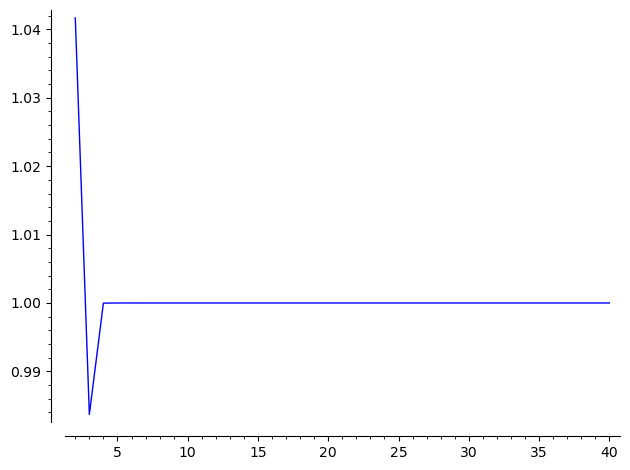

LOGS MINIMUM MODULI


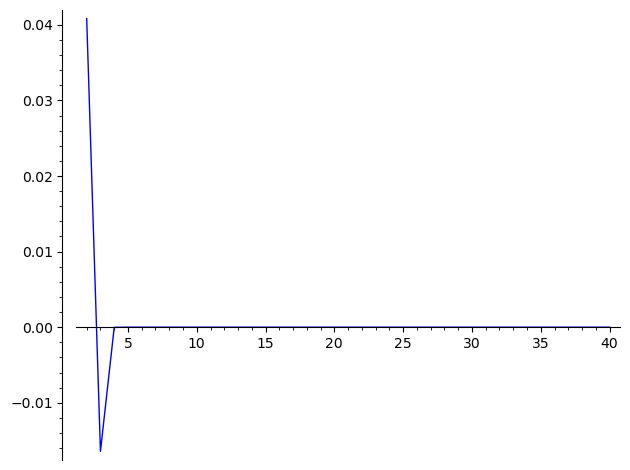

minimum logarithm of minimum modulus: -0.016429154435523532899667000077
Data range: n = 2 to 40
Number of data points: 39
Min modulus range: 0.983705 to 1.041667
Log min modulus range: -0.016429 to 0.040822

Polynomial trend coefficients: [ 1.26496072e-05 -6.28338821e-04  6.63914942e-03]
Detrended data std dev: 0.0068

TOP DOMINANT PERIODICITIES (in index n)
Rank   Period       Frequency    Power          
----------------------------------------------------------------------


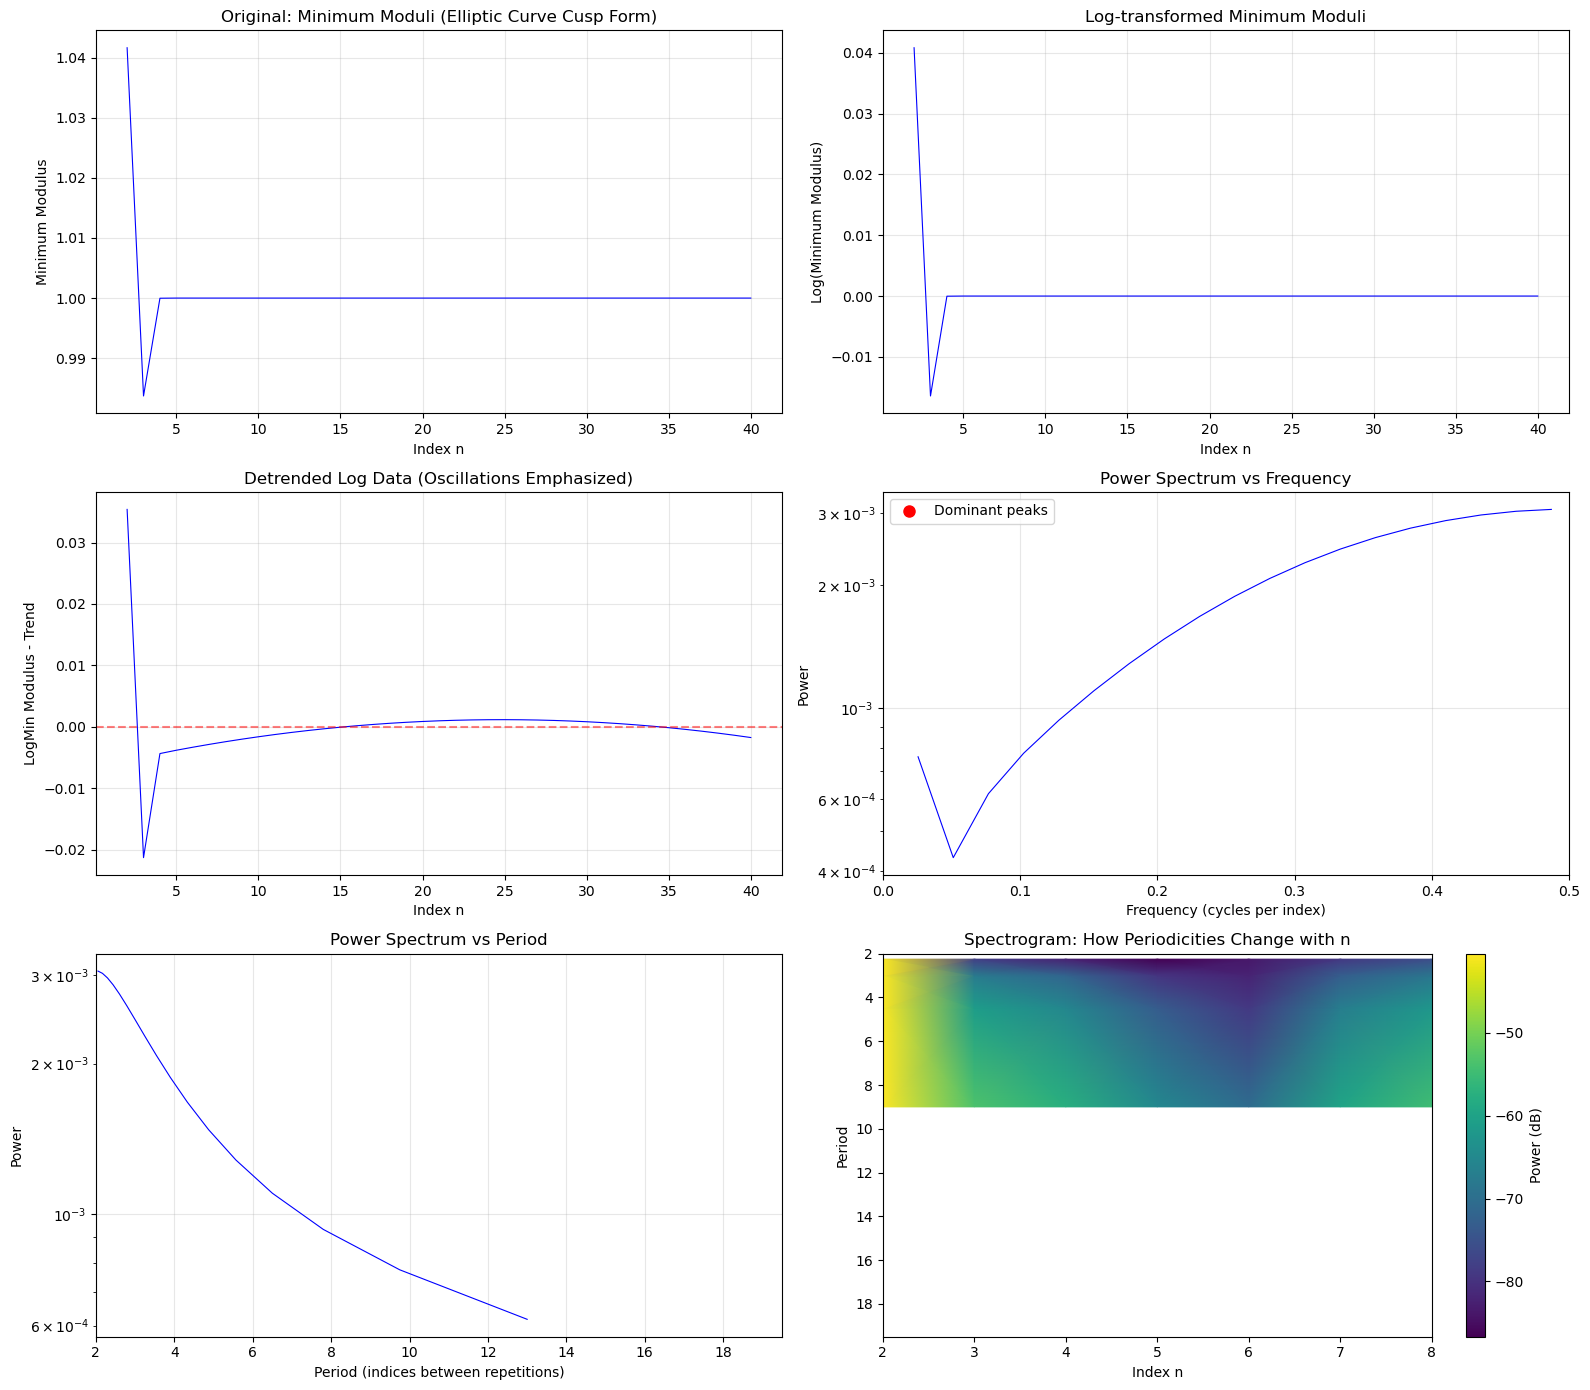


Analysis complete! Examine the plots and frequency table above.


In [16]:
import pickle
from sage.all import sigma, nth_prime, matrix, flatten, QQ
import ast
import time
Rx.<x> = QQ[]

start=time.time()

def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_prime(k):
    pn = nth_prime(k)
    return tau(pn)

tau_prime_list = [] 
for k in range(1, 501):
    tau_prime_list.append((k, tau_prime(k) ) )
    
c = 1 #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< c = 0 gives an error message
h_list = [(0, 1)] + tau_prime_list 
j_list = [(0, c)]
for n in range(1,500):
    sm = 0
    for r in range(1, n): 
        sm = sm + j_list[r][1] * h_list[n-r][1] 
    j_n = n * h_list[n][1] - sm
    j_list.append((n, j_n))
    
def P_matrix(lst):
    lenlist = len(lst)
    columns = [lst]
    for k in range(1, lenlist):
        column = [0]*(k-1)
        column = column + [-k]
        column = flatten(column + [lst])
        column = column + [lst]
        column = column[:lenlist]
        columns += [column]
    return (matrix(columns)).transpose()

# Create polynomial ring for Lagrange interpolation
R = QQ['x']
precision_bits=100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
poly_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
data=[]
for n in range(1, 41):
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs)
    if n<5:
        show(pl)
    det=pl.det()
    print((n,det))
    #data.append((n,det*factorial(n)))
    data.append((n,det))
    poly=Rx.lagrange_polynomial(data)
    print("poly:")
    print(factor(poly))
    poly_list.append((n,poly))
    roots = poly.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))

p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))



with open('/Users/barrybrent/data2/run19feb26no1.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) # ouput snipped


with open('/Users/barrybrent/data2/run19feb26no2.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) # ouput snipped

with open('/Users/barrybrent/data2/run19feb6no3.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) # ouput snipped

# FOURIER ANALYSIS OF MINIMUM MODULI - Elliptic Curve Cusp Form
# This cell performs spectral analysis on the minimum moduli sequence
# to detect periodicities, dominant frequencies, and oscillatory patterns

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ==============================================================================
# 1. PREPARE THE DATA - Convert from SageMath to Python/NumPy types
# ==============================================================================

# Extract the data from mins_list and convert to Python floats
# This is crucial because SageMath uses its own numeric types
indices = np.array([float(pair[0]) for pair in mins_list], dtype=np.float64)
minmoduli = np.array([float(pair[1]) for pair in mins_list], dtype=np.float64)

# Mask out zeros so logs are finite
mask = minmoduli > 0
indices = indices[mask]
minmoduli = minmoduli[mask]
logminmoduli = np.log(minmoduli)

print(f"Data range: n = {int(indices[0])} to {int(indices[-1])}")
print(f"Number of data points: {len(indices)}")
print(f"Min modulus range: {minmoduli.min():.6f} to {minmoduli.max():.6f}")
print(f"Log min modulus range: {logminmoduli.min():.6f} to {logminmoduli.max():.6f}")

# ==============================================================================
# 2. DETRENDING (Important for seeing oscillations)
# ==============================================================================

# For the log data, remove any polynomial trend to focus on oscillations
# We'll try both linear and quadratic detrending

# Linear detrend
log_detrended_linear = signal.detrend(logminmoduli, type='linear')

# Polynomial detrend (degree 2) - captures parabolic growth
poly_coeffs = np.polyfit(indices, logminmoduli, deg=2)
poly_trend = np.polyval(poly_coeffs, indices)
log_detrended_poly = logminmoduli - poly_trend

print(f"\nPolynomial trend coefficients: {poly_coeffs}")
print(f"Detrended data std dev: {np.std(log_detrended_poly):.4f}")

# ==============================================================================
# 3. COMPUTE FOURIER TRANSFORM
# ==============================================================================

# Use FFT on the detrended log data
# The FFT reveals which "frequencies" (periodicities in n) are present

fft_result = np.fft.fft(log_detrended_poly)
fft_frequencies = np.fft.fftfreq(len(indices), d=1.0)  # d=1 means indices are spaced by 1

# Power spectrum (magnitude squared)
power_spectrum = np.abs(fft_result)**2

# Only keep positive frequencies (negative are redundant for real signals)
positive_freq_mask = fft_frequencies > 0
frequencies = fft_frequencies[positive_freq_mask]
power = power_spectrum[positive_freq_mask]

# Convert frequency to period: period = 1/frequency
# (period tells us "spikes repeat every X indices")
periods = 1.0 / frequencies

# ==============================================================================
# 4. IDENTIFY DOMINANT FREQUENCIES
# ==============================================================================

# Find peaks in the power spectrum
# Lower threshold to catch more peaks since we have more data (n up to 400)
peak_indices = signal.find_peaks(power, height=np.max(power)*0.05)[0]  # peaks at least 5% of max
peak_powers = power[peak_indices]
peak_periods = periods[peak_indices]

# Sort by power (strongest first)
sorted_indices = np.argsort(peak_powers)[::-1]
top_peaks = sorted_indices[:min(15, len(sorted_indices))]  # Show top 15

print("\n" + "="*70)
print("TOP DOMINANT PERIODICITIES (in index n)")
print("="*70)
print(f"{'Rank':<6} {'Period':<12} {'Frequency':<12} {'Power':<15}")
print("-"*70)
for rank, idx in enumerate(top_peaks, 1):
    period = peak_periods[idx]
    freq = frequencies[peak_indices[idx]]
    pwr = peak_powers[idx]
    print(f"{rank:<6} {period:>10.2f} {freq:>10.6f} {pwr:>12.2e}")

# ==============================================================================
# 5. VISUALIZATIONS
# ==============================================================================

fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Plot 5.1: Original data (linear scale)
axes[0, 0].plot(indices, minmoduli, 'b-', linewidth=0.8)
axes[0, 0].set_xlabel('Index n')
axes[0, 0].set_ylabel('Minimum Modulus')
axes[0, 0].set_title('Original: Minimum Moduli (Elliptic Curve Cusp Form)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 5.2: Log scale data
axes[0, 1].plot(indices, logminmoduli, 'b-', linewidth=0.8)
axes[0, 1].set_xlabel('Index n')
axes[0, 1].set_ylabel('Log(Minimum Modulus)')
axes[0, 1].set_title('Log-transformed Minimum Moduli')
axes[0, 1].grid(True, alpha=0.3)

# Plot 5.3: Detrended data (shows oscillations more clearly)
axes[1, 0].plot(indices, log_detrended_poly, 'b-', linewidth=0.8)
axes[1, 0].set_xlabel('Index n')
axes[1, 0].set_ylabel('LogMin Modulus - Trend')
axes[1, 0].set_title('Detrended Log Data (Oscillations Emphasized)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Plot 5.4: Power Spectrum vs Frequency
axes[1, 1].semilogy(frequencies, power, 'b-', linewidth=0.8)
axes[1, 1].semilogy(frequencies[peak_indices[top_peaks]],
                    peak_powers[top_peaks],
                    'ro', markersize=8, label='Dominant peaks')
axes[1, 1].set_xlabel('Frequency (cycles per index)')
axes[1, 1].set_ylabel('Power')
axes[1, 1].set_title('Power Spectrum vs Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, 0.5)  # Nyquist limit

# Plot 5.5: Power Spectrum vs Period (often more intuitive)
maxperiod = len(indices) / 2  # Only plot periods up to half the data length
periodmask = periods < maxperiod
axes[2, 0].semilogy(periods[periodmask], power[periodmask], 'b-', linewidth=0.8)

# Mark dominant periods
for idx in top_peaks:
    if peak_periods[idx] < maxperiod:
        axes[2, 0].semilogy(peak_periods[idx], peak_powers[idx],
                            'ro', markersize=8)

axes[2, 0].set_xlabel('Period (indices between repetitions)')
axes[2, 0].set_ylabel('Power')
axes[2, 0].set_title('Power Spectrum vs Period')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim(2, maxperiod)

# Plot 5.6: Spectrogram (time-frequency analysis using Short-Time Fourier Transform)
# This shows if periodicities change over the sequence
window_size = min(128, len(indices)//4)  # adaptive window size, larger for more data
fspec, tspec, Sxx = signal.spectrogram(log_detrended_poly, fs=1.0,
                                       nperseg=window_size,
                                       noverlap=window_size//2)

# Convert frequency axis to period for easier interpretation
periodspec = 1.0 / (fspec + 1e-10)  # avoid division by zero
periodspec = periodspec[1:]  # remove DC component
Sxx = Sxx[1:, :]

# Plot with period on y-axis, inverted so small periods at bottom
im = axes[2, 1].pcolormesh(indices[0:len(tspec)], periodspec,
                           10*np.log10(Sxx + 1e-10),
                           shading='gouraud', cmap='viridis')
axes[2, 1].set_xlabel('Index n')
axes[2, 1].set_ylabel('Period')
axes[2, 1].set_title('Spectrogram: How Periodicities Change with n')
axes[2, 1].set_ylim(2, min(100, maxperiod))
axes[2, 1].invert_yaxis()  # small periods at bottom
plt.colorbar(im, ax=axes[2, 1], label='Power (dB)')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Analysis complete! Examine the plots and frequency table above.")
print("="*70)


In [18]:
for  x in mins_list:
    print(x)

(2, 1.0416666666666666666666666667)
(3, 0.98370506806290185870988913154)
(4, 0.99997382849800942995658367561)
(5, 1.0000003215180629600208911103)
(6, 0.99999999581632084633611394547)
(7, 1.0000000003392965048857246049)
(8, 1.0000000000003401122353733351)
(9, 0.99999999999999869575033543240)
(10, 1.0000000000000000088665533347)
(11, 0.99999999999999999979143790394)
(12, 0.99999999999999999999973622361)
(13, 1.0000000000000000000000006065)
(14, 0.99999999999999999999999999744)
(15, 1.0000000000000000000000000001)
(16, 1.0000000000000000000000000000)
(17, 0.99999999999999999999999999995)
(18, 1.0000000000000000000000000000)
(19, 1.0000000000000000000000000000)
(20, 0.99999999999999999999999999992)
(21, 0.99999999999999999999999999997)
(22, 0.99999999999999999999999999997)
(23, 0.99999999999999999999999999990)
(24, 0.99999999999999999999999999999)
(25, 0.99999999999999999999999999993)
(26, 1.0000000000000000000000000001)
(27, 1.0000000000000000000000000000)
(28, 1.0000000000000000000000000